# IMPORT DATASET

In [1]:
#1) Delivery_time -> Predict delivery time using sorting time

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dt=pd.read_csv('delivery_time.csv')


In [4]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
dt.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},inplace=True)

In [6]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [7]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
dt.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


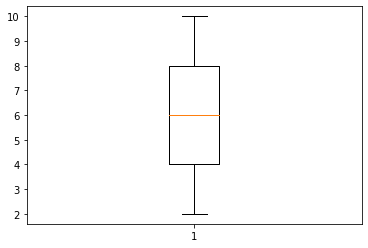

In [10]:
#cheking the outlier present in dataset by using boxplot
plt.boxplot(dt['Sorting_Time'])
plt.show()

In [11]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

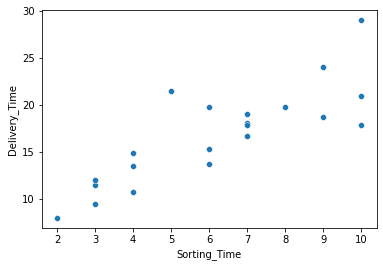

In [12]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=dt)
plt.show()

# correlation

In [13]:
dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [14]:
#another way of finding correlation
#dt["Delivery_Time"].corr(dt["Sorting_Time"])

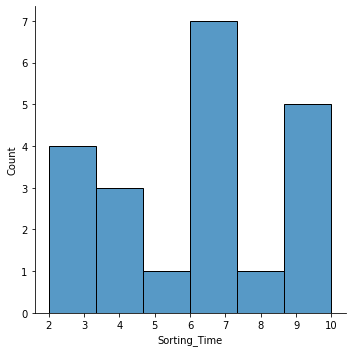

In [15]:
sns.displot(dt['Sorting_Time'])

C:\Users\lax\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

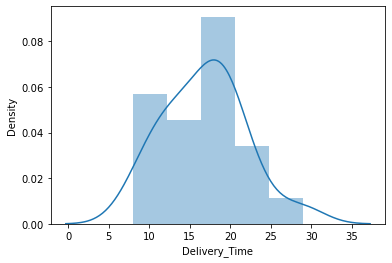

In [16]:
sns.distplot(dt["Delivery_Time"])

# Fitting a regression Model

In [17]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [18]:
#  y=dt["Delivery Time"]
# x=dt["Sorting Time"]

In [19]:
import statsmodels.formula.api as smf
#model=smf.ols("y~x",data=dt).fit()
model=smf.ols("Delivery_Time~Sorting_Time",data=dt).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

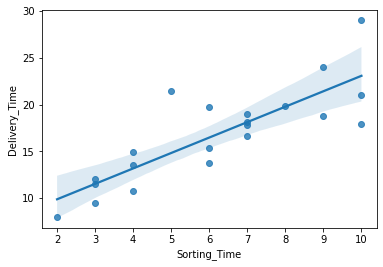

In [20]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=dt)

In [21]:
#in these we saw all information about model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        23:26:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#coeffient
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [23]:
print(model.tvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [24]:
print(model.pvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
#R-squred Value

In [26]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [27]:
dt

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Predict For new Data point

In [28]:
#for predicting delivered time 

In [29]:
value=pd.Series([10,8,2,6])
value

0    10
1     8
2     2
3     6
dtype: int64

In [30]:
pred_sort2=pd.DataFrame(value,columns=["Sorting_Time"])
pred_sort2

,Sorting_Time
0,10
1,8
2,2
3,6


In [31]:
model.predict(pred_sort2)

0    23.072933
1    19.774893
2     9.880774
3    16.476853
dtype: float64

# Problem No-2

# 2]2) Salary_hike -> Build a prediction model for Salary_hike


In [32]:
s_hike=pd.read_csv("Salary_Data.csv")


In [33]:
s_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
#we have check the basic information
s_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [35]:
s_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\lax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


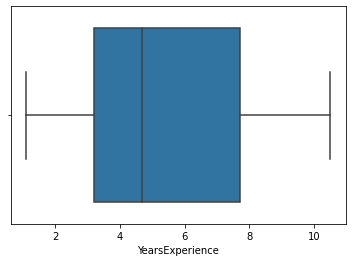

In [36]:
#there is no outlier present in dataset
sns.boxplot(s_hike["YearsExperience"],data=s_hike)
plt.show()

In [37]:
#so now we have check the correlation between year of Experience and Salary Hike

In [38]:
s_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [39]:
#optional for finding the corelation between them
corr1=s_hike["YearsExperience"].corr(s_hike["Salary"])

In [40]:
round(corr1,4)

0.9782

In [41]:
#in the above r>=0.85 is the good model for us

# Fitting the regression model

In [42]:
import statsmodels.formula.api as smf


In [43]:
model2=smf.ols("Salary~YearsExperience",data=s_hike).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

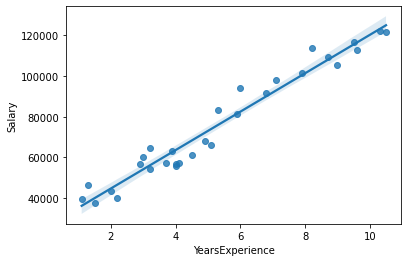

In [44]:
sns.regplot(x="YearsExperience",y="Salary",data=s_hike)

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        23:26:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [47]:
#in the above p-value is less than alpha=0.05 we reject the null hypothesis

In [48]:
#as the result salary hike depends on year of experience

# Predict for salary hike

In [49]:
values=pd.Series([8,15,20,10])
values

0     8
1    15
2    20
3    10
dtype: int64

In [50]:
pred_shike=pd.DataFrame(values,columns=["YearsExperience"])


In [51]:
pred_shike

,YearsExperience
0,8
1,15
2,20
3,10


In [52]:
model2.predict(pred_shike)

0    101391.898770
1    167541.635020
2    214791.446628
3    120291.823413
dtype: float64

In [53]:
s_hike.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
